In [220]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
amostras = pd.read_excel('/content/drive/MyDrive/scratch/Amostras.xlsx')

In [223]:
amostras

,Unnamed: 0,Pt ext 1 praia Resultado,Pt ext 2 praia Resultado,Ponto 1 Praia resultado,Ponto 2 Praia resultado,Ponto 3 Resultado,Ponto 4 Resultado,Ponto 5 Resultado,Ponto 6 Resultado,Ponto 7 Resultado,...,11,12,13,14,15,16,17,18,19,20
0,Areia Muito Fina,0.19,0.68,0.11,1.05,0.87,0.37,0.24,0.22,4.64,...,14.6732,21.0074,28.1278,10.9098,13.0810,12.0424,7.6870,27.1158,7.6584,26.8000
1,Areia Fina,2.83,6.46,4.51,8.57,16.45,11.34,8.72,16.34,72.50,...,84.7112,78.8624,72.1196,88.7038,81.9090,81.7930,86.2856,70.2722,88.3334,44.7072
2,Areia Média,28.88,36.75,13.22,12.06,28.07,45.89,32.40,57.91,21.56,...,1.5608,1.8594,1.0672,1.2638,6.1258,7.0724,7.1964,3.4778,5.6700,8.0272
3,Areia Grossa,68.11,56.11,82.15,78.32,54.61,42.40,58.64,25.54,1.30,...,0.3590,0.0000,0.0486,0.0246,0.1438,0.0806,0.0770,0.1808,0.0184,6.9980
4,Areia Muito Grossa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.1172,0.0080,0.0252,0.0000,0.1092,0.0160,0.0290,0.0720,0.0142,9.5254


In [224]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(amostras, *['Pt ext 1 praia Resultado', 'Unnamed: 0'], **{'inner': 'stick'})
chart

In [225]:
chart = violin_plot(amostras, *['Pt ext 1 praia Resultado', 'Unnamed: 0'], **{'inner': 'stick'})
chart

In [226]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(amostras, *['Pt ext 1 praia Resultado'], **{})
chart

In [227]:
chart = value_plot(amostras, *['Pt ext 2 praia Resultado'], **{})
chart

In [228]:

# Lê o arquivo Excel
path = '/content/drive/MyDrive/scratch/Amostras.xlsx'
df = pd.read_excel(path)

# Transforma o DataFrame
df_melted = df.melt(id_vars=['Unnamed: 0'], var_name='Ponto', value_name='Valor')

# Pivotando o DataFrame
df_pivoted = df_melted.pivot(index='Unnamed: 0', columns='Ponto', values='Valor')

# Resetando o índice
df_pivoted.reset_index(inplace=True)

# Exibindo o DataFrame pivotado
print(df_pivoted)


Ponto          Unnamed: 0        1        2        3        4        5  \
0              Areia Fina  69.8760  75.0746  75.1416  86.0298  84.6868   
1            Areia Grossa   0.2662   0.5286   0.8096   0.0398   0.0484   
2        Areia Muito Fina   2.0924  19.1372  19.0926  10.7008   9.3312   
3      Areia Muito Grossa   0.0608   0.1792   0.4092   0.0230   0.0000   
4             Areia Média  28.8416   6.3042   5.5218   3.8824   7.2524   

Ponto        6        7        8        9  ...  Ponto 2 Praia resultado  \
0      84.4632  70.7320  86.9142  86.0012  ...                     8.57   
1       0.2572   0.3142   7.6320   0.0322  ...                    78.32   
2       6.3554  27.8808   6.3588   9.7046  ...                     1.05   
3       0.0674   0.0732   0.0116   0.0164  ...                     0.00   
4      10.3564   2.1884   0.2898   5.3584  ...                    12.06   

Ponto  Ponto 3 Resultado  Ponto 4 Resultado  Ponto 5 Resultado  \
0                  16.45              

In [229]:
df.columns = [              'Gran', 'Pt ext 1 praia Resultado',
       'Pt ext 2 praia Resultado',  'Ponto 1 Praia resultado',
        'Ponto 2 Praia resultado',        'Ponto 3 Resultado',
              'Ponto 4 Resultado',        'Ponto 5 Resultado',
              'Ponto 6 Resultado',        'Ponto 7 Resultado',
              'Ponto 8 Resultado',        'Ponto 9 Resultado',
             'Ponto 10 Resultado',                          1,
                                2,                          3,
                                4,                          5,
                                6,                          7,
                                8,                          9,
                               10,                         11,
                               12,                         13,
                               14,                         15,
                               16,                         17,
                               18,                         19,
                               20]

In [230]:
# Pivotando o DataFrame
df_melted = pd.melt(df, id_vars=['Gran'], var_name='Amostras', value_name='Percentage')

# Pivotando para transformar 'SAMPLE' em colunas e 'Element' em linhas
df_pivoted = df_melted.pivot(index='Amostras', columns='Gran', values='Percentage')

# Resetando o índice para tornar 'Element' uma coluna regular
df_pivoted.reset_index(inplace=True)

print(df_pivoted)

Gran                  Amostras  Areia Fina  Areia Grossa  Areia Muito Fina  \
0                            1     69.8760        0.2662            2.0924   
1                            2     75.0746        0.5286           19.1372   
2                            3     75.1416        0.8096           19.0926   
3                            4     86.0298        0.0398           10.7008   
4                            5     84.6868        0.0484            9.3312   
5                            6     84.4632        0.2572            6.3554   
6                            7     70.7320        0.3142           27.8808   
7                            8     86.9142        7.6320            6.3588   
8                            9     86.0012        0.0322            9.7046   
9                           10     74.8264        0.0360           24.4514   
10                          11     84.7112        0.3590           14.6732   
11                          12     78.8624        0.0000        

In [231]:
df_pivoted

Gran,Amostras,Areia Fina,Areia Grossa,Areia Muito Fina,Areia Muito Grossa,Areia Média
0,1,69.8760,0.2662,2.0924,0.0608,28.8416
1,2,75.0746,0.5286,19.1372,0.1792,6.3042
2,3,75.1416,0.8096,19.0926,0.4092,5.5218
3,4,86.0298,0.0398,10.7008,0.0230,3.8824
4,5,84.6868,0.0484,9.3312,0.0000,7.2524
5,6,84.4632,0.2572,6.3554,0.0674,10.3564
6,7,70.7320,0.3142,27.8808,0.0732,2.1884
7,8,86.9142,7.6320,6.3588,0.0116,0.2898
8,9,86.0012,0.0322,9.7046,0.0164,5.3584
9,10,74.8264,0.0360,24.4514,0.0326,2.4456


In [232]:

# # Deleta a coluna 'Gran'
# df = df_pivoted.drop(columns=['Gran'])

# Define a coluna 'Amostras' como índice
df = df_pivoted.set_index('Amostras')

# Exibe o DataFrame modificado
print(df)

Gran                      Areia Fina  Areia Grossa  Areia Muito Fina  \
Amostras                                                               
1                            69.8760        0.2662            2.0924   
2                            75.0746        0.5286           19.1372   
3                            75.1416        0.8096           19.0926   
4                            86.0298        0.0398           10.7008   
5                            84.6868        0.0484            9.3312   
6                            84.4632        0.2572            6.3554   
7                            70.7320        0.3142           27.8808   
8                            86.9142        7.6320            6.3588   
9                            86.0012        0.0322            9.7046   
10                           74.8264        0.0360           24.4514   
11                           84.7112        0.3590           14.6732   
12                           78.8624        0.0000           21.

In [233]:
df

Gran,Areia Fina,Areia Grossa,Areia Muito Fina,Areia Muito Grossa,Areia Média
Amostras,,,,,
1,69.8760,0.2662,2.0924,0.0608,28.8416
2,75.0746,0.5286,19.1372,0.1792,6.3042
3,75.1416,0.8096,19.0926,0.4092,5.5218
4,86.0298,0.0398,10.7008,0.0230,3.8824
5,84.6868,0.0484,9.3312,0.0000,7.2524
6,84.4632,0.2572,6.3554,0.0674,10.3564
7,70.7320,0.3142,27.8808,0.0732,2.1884
8,86.9142,7.6320,6.3588,0.0116,0.2898
9,86.0012,0.0322,9.7046,0.0164,5.3584


In [234]:
# Resetando o índice e mantendo a coluna 'Amostras'
df_reset = df.reset_index(drop=False)

# Exibindo o DataFrame com o índice resetado
print(df_reset)

Gran                  Amostras  Areia Fina  Areia Grossa  Areia Muito Fina  \
0                            1     69.8760        0.2662            2.0924   
1                            2     75.0746        0.5286           19.1372   
2                            3     75.1416        0.8096           19.0926   
3                            4     86.0298        0.0398           10.7008   
4                            5     84.6868        0.0484            9.3312   
5                            6     84.4632        0.2572            6.3554   
6                            7     70.7320        0.3142           27.8808   
7                            8     86.9142        7.6320            6.3588   
8                            9     86.0012        0.0322            9.7046   
9                           10     74.8264        0.0360           24.4514   
10                          11     84.7112        0.3590           14.6732   
11                          12     78.8624        0.0000        

In [235]:
df_reset

Gran,Amostras,Areia Fina,Areia Grossa,Areia Muito Fina,Areia Muito Grossa,Areia Média
0,1,69.8760,0.2662,2.0924,0.0608,28.8416
1,2,75.0746,0.5286,19.1372,0.1792,6.3042
2,3,75.1416,0.8096,19.0926,0.4092,5.5218
3,4,86.0298,0.0398,10.7008,0.0230,3.8824
4,5,84.6868,0.0484,9.3312,0.0000,7.2524
5,6,84.4632,0.2572,6.3554,0.0674,10.3564
6,7,70.7320,0.3142,27.8808,0.0732,2.1884
7,8,86.9142,7.6320,6.3588,0.0116,0.2898
8,9,86.0012,0.0322,9.7046,0.0164,5.3584
9,10,74.8264,0.0360,24.4514,0.0326,2.4456


In [236]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

# chart = categorical_histogram(df, *['AREA'], **{})
# chart

In [237]:

# def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
#   from matplotlib import pyplot as plt
#   plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
#   for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
#     ax = plt.subplot(1, len(colname_pairs), plot_i)
#     df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
#     ax.spines[['top', 'right',]].set_visible(False)
#   plt.tight_layout()
#   return autoviz.MplChart.from_current_mpl_state()

# chart = scatter_plots(holes, *[[['Cr2O3_perc', 'MgO_perc'], ['Cr2O3_perc', 'SiO2_perc'], ['Cr2O3_perc', 'Al2O3_perc'], ['Cr2O3_perc', 'Fe2O3_perc']]], **{})
# chart

In [238]:
df_reset.columns

Index(['Amostras', 'Areia Fina', 'Areia Grossa', 'Areia Muito Fina',
       'Areia Muito Grossa', 'Areia Média'],
      dtype='object', name='Gran')

In [239]:
df_reset = df_reset[['Amostras', 'Areia Muito Fina', 'Areia Fina', 'Areia Média', 'Areia Grossa', 'Areia Muito Grossa']]

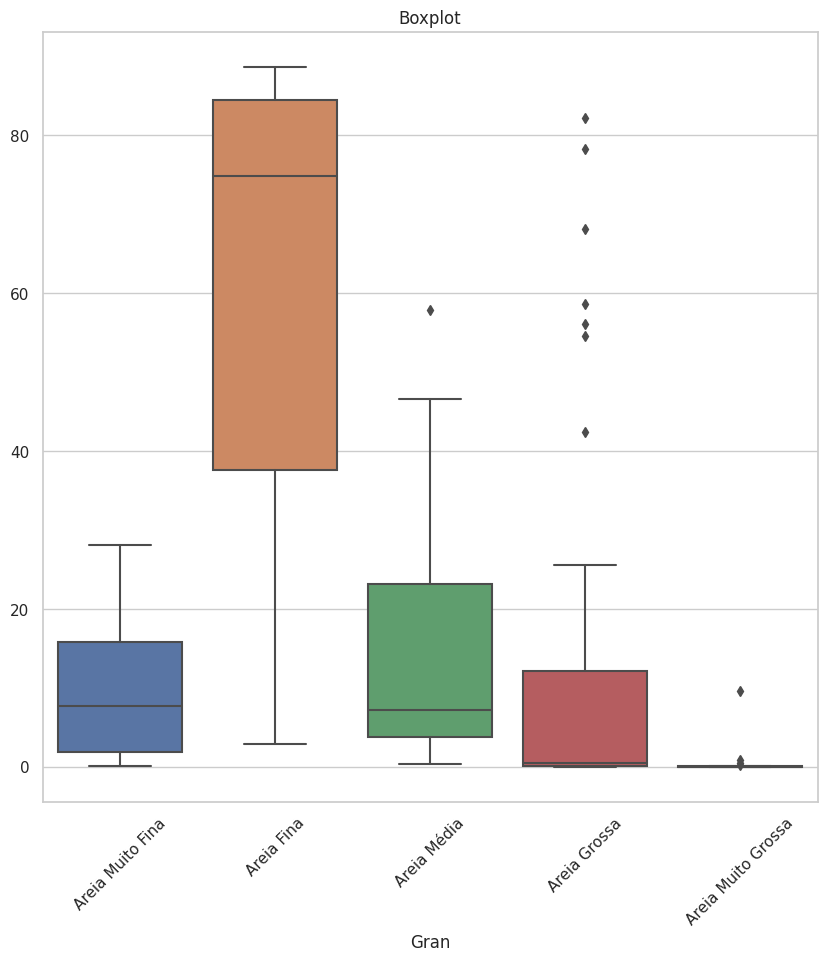

In [240]:

# Removendo a coluna 'SAMPLE' para o gráfico
df_plot = df_reset.drop(['Amostras'], axis=1)

# Criando o boxplot
plt.figure(figsize=(10, 10))  # Configurar o tamanho da figura
sns.boxplot(data=df_plot)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.title('Boxplot')  # Título do gráfico
plt.show()

<ipython-input-241-d23bb4e96d2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_reset.corr()


<Axes: xlabel='Gran', ylabel='Gran'>

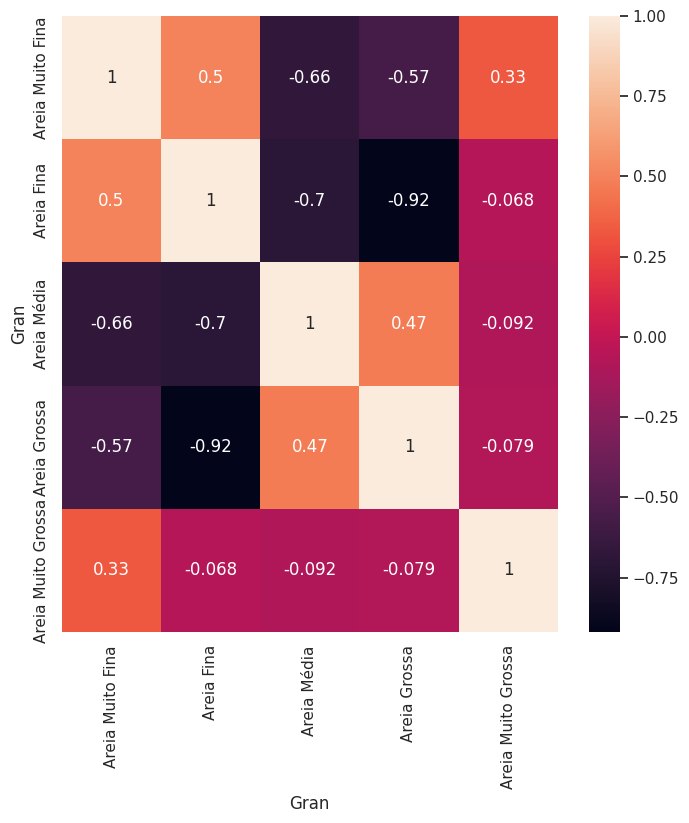

In [241]:
corr = df_reset.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

In [242]:

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_reset, *['Areia Fina'], **{})
chart

In [243]:

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_reset, *['Areia Grossa'], **{})
chart

In [244]:
df_reset = df_reset[['Amostras', 'Areia Muito Fina', 'Areia Fina', 'Areia Média', 'Areia Grossa', 'Areia Muito Grossa']]

<ipython-input-245-1c85dfb56a9b>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df_reset.mean()


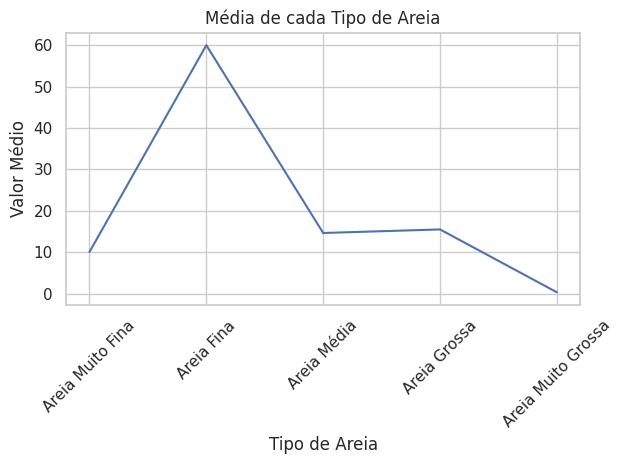

In [245]:
# Define o estilo do Seaborn
sns.set(style="whitegrid")

# Calcula a média de cada tipo de areia e plota
means = df_reset.mean()
sns.lineplot(x=means.index, y=means.values)

# Ajusta os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Define o título e os rótulos dos eixos
plt.title('Média de cada Tipo de Areia')
plt.xlabel('Tipo de Areia')
plt.ylabel('Valor Médio')

# Mostra o gráfico
plt.tight_layout()
plt.show()

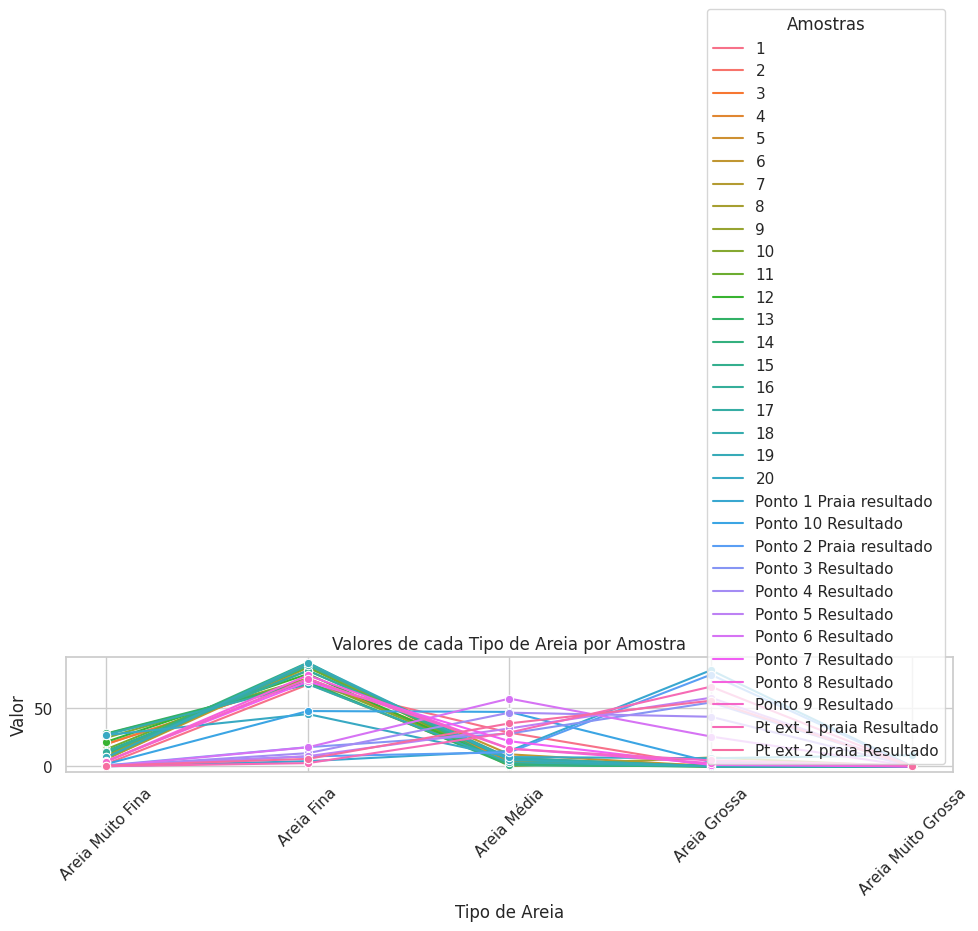

In [246]:


# Define o estilo do Seaborn
sns.set(style="whitegrid")

# Reformatando o DataFrame para "long format"
df_melted = df_reset.melt(id_vars='Amostras',
                    value_vars=['Areia Muito Fina','Areia Fina', 'Areia Média', 'Areia Grossa', 'Areia Muito Grossa'],
                    var_name='Tipo de Areia',
                    value_name='Valor')

# Criando o gráfico de linhas com Seaborn
plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted, x='Tipo de Areia', y='Valor', hue='Amostras', marker="o")

# Ajusta os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Define o título e os rótulos dos eixos
plt.title('Valores de cada Tipo de Areia por Amostra')
plt.xlabel('Tipo de Areia')
plt.ylabel('Valor')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


In [247]:

data_ref = {
    'Amostras': ['Pt ext 1 praia Resultado', 'Pt ext 2 praia Resultado'],
    'Areia Muito Fina': [0.0019, 0.0068],
    'Areia Fina': [002.83, 006.46],
    'Areia Média': [028.88, 036.75],
    'Areia Grossa': [068.11, 056.11],
    'Areia Muito Grossa': [000.00, 000.00]
}

ref_df = pd.DataFrame(data_ref)

# Definir 'Amostras' como o índice do DataFrame
ref_df.set_index('Amostras', inplace=True)

# Exibir o DataFrame de referência
print(ref_df)


                          Areia Muito Fina  Areia Fina  Areia Média  \
Amostras                                                              
Pt ext 1 praia Resultado            0.0019        2.83        28.88   
Pt ext 2 praia Resultado            0.0068        6.46        36.75   

                          Areia Grossa  Areia Muito Grossa  
Amostras                                                    
Pt ext 1 praia Resultado         68.11                 0.0  
Pt ext 2 praia Resultado         56.11                 0.0  


In [248]:
# Resetando o índice e mantendo a coluna 'Amostras'
ref_df = ref_df.reset_index(drop=False)

# Exibindo o DataFrame com o índice resetado
print(ref_df)

                   Amostras  Areia Muito Fina  Areia Fina  Areia Média  \
0  Pt ext 1 praia Resultado            0.0019        2.83        28.88   
1  Pt ext 2 praia Resultado            0.0068        6.46        36.75   

   Areia Grossa  Areia Muito Grossa  
0         68.11                 0.0  
1         56.11                 0.0  


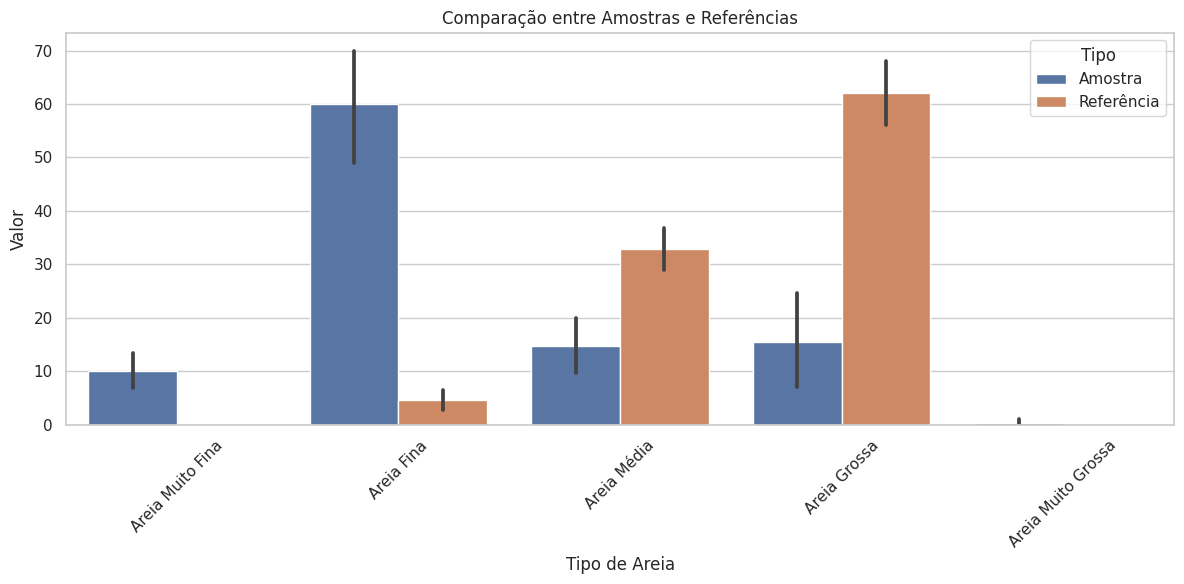

In [249]:

# Supondo que ref_df seja o seu DataFrame de valores de referência
# Transformar ref_df para um formato similar ao de df
ref_df_melted = ref_df.melt(id_vars='Amostras',
                           value_vars=['Areia Muito Fina', 'Areia Fina', 'Areia Média', 'Areia Grossa', 'Areia Muito Grossa'],
                           var_name='Tipo de Areia',
                           value_name='Valor')

# Adicionando uma coluna para indicar que são dados de referência
ref_df_melted['Tipo'] = 'Referência'

# Transformar df para o formato longo
df_melted = df_reset.melt(id_vars='Amostras',
                    value_vars=['Areia Muito Fina', 'Areia Fina', 'Areia Média', 'Areia Grossa', 'Areia Muito Grossa'],
                    var_name='Tipo de Areia',
                    value_name='Valor')

# Adicionando uma coluna para indicar que são dados das suas amostras
df_melted['Tipo'] = 'Amostra'

# Concatenar os dois DataFrames transformados
final_df = pd.concat([df_melted, ref_df_melted])

# Plotar os dados
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df, x='Tipo de Areia', y='Valor', hue='Tipo')
plt.title('Comparação entre Amostras e Referências')
plt.xlabel('Tipo de Areia')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [250]:
df = df_reset

In [251]:
df

Gran,Amostras,Areia Muito Fina,Areia Fina,Areia Média,Areia Grossa,Areia Muito Grossa
0,1,2.0924,69.8760,28.8416,0.2662,0.0608
1,2,19.1372,75.0746,6.3042,0.5286,0.1792
2,3,19.0926,75.1416,5.5218,0.8096,0.4092
3,4,10.7008,86.0298,3.8824,0.0398,0.0230
4,5,9.3312,84.6868,7.2524,0.0484,0.0000
5,6,6.3554,84.4632,10.3564,0.2572,0.0674
6,7,27.8808,70.7320,2.1884,0.3142,0.0732
7,8,6.3588,86.9142,0.2898,7.6320,0.0116
8,9,9.7046,86.0012,5.3584,0.0322,0.0164
9,10,24.4514,74.8264,2.4456,0.0360,0.0326


In [252]:
df.describe()

Gran,Areia Muito Fina,Areia Fina,Areia Média,Areia Grossa,Areia Muito Grossa
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,10.089000,59.969163,14.667869,15.526094,0.364675
std,9.411792,31.322034,15.431324,26.631371,1.680054
min,0.110000,2.830000,0.289800,0.000000,0.000000
25%,1.800000,37.642900,3.781250,0.069900,0.000000
50%,7.672700,74.798200,7.224400,0.443800,0.015100
75%,15.778050,84.519100,23.187500,12.109000,0.068550
max,28.127800,88.703800,57.910000,82.150000,9.525400


<ipython-input-253-d9a8ab19da90>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  differences = df_plot.loc[:, aligned_columns].subtract(ref_df.mean())


     index       Tipo de Areia  Diferença
0        0    Areia Muito Fina    2.08805
1        1    Areia Muito Fina   19.13285
2        2    Areia Muito Fina   19.08825
3        3    Areia Muito Fina   10.69645
4        4    Areia Muito Fina    9.32685
..     ...                 ...        ...
155     27  Areia Muito Grossa    0.00000
156     28  Areia Muito Grossa    0.00000
157     29  Areia Muito Grossa    0.88000
158     30  Areia Muito Grossa    0.00000
159     31  Areia Muito Grossa    0.00000

[160 rows x 3 columns]


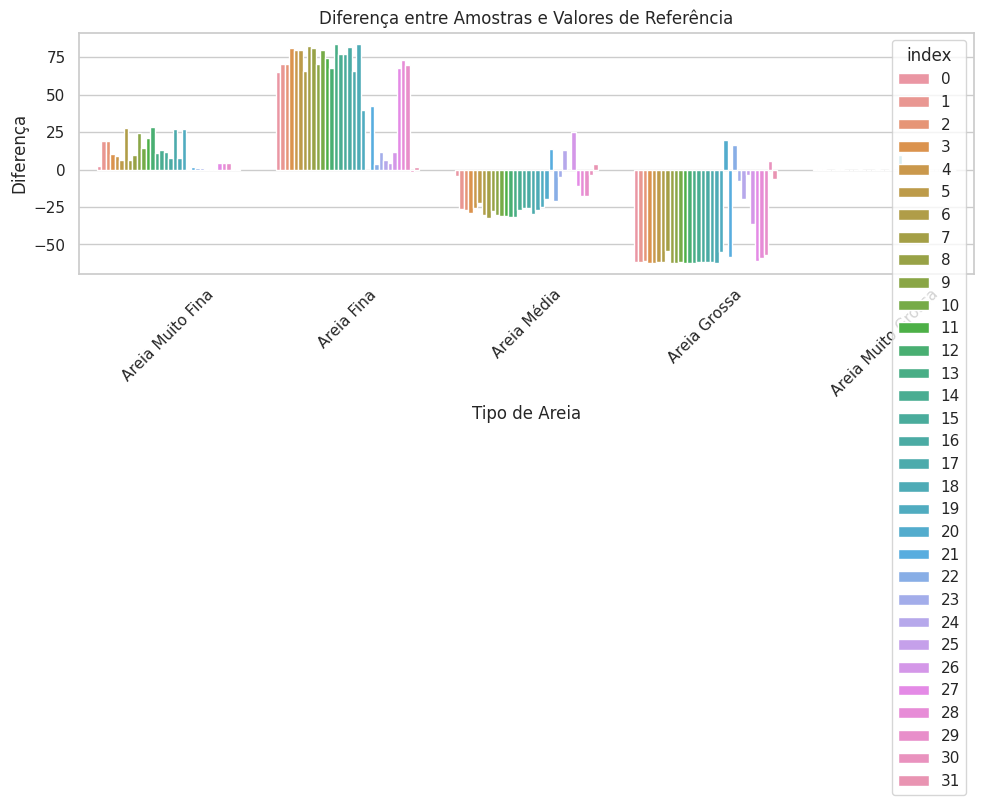

In [253]:
# Certifique-se que as colunas estão alinhadas
aligned_columns = df_plot.columns.intersection(ref_df.columns)

# Calculando as diferenças apenas para colunas alinhadas
differences = df_plot.loc[:, aligned_columns].subtract(ref_df.mean())

# Mudando o formato do DataFrame para long format para o plot
differences_melted = differences.reset_index().melt(id_vars=df.index.name or 'index', var_name='Tipo de Areia', value_name='Diferença')

# Verificar o DataFrame antes de plotar
print(differences_melted)

# Plotando as diferenças
plt.figure(figsize=(10, 6))
sns.barplot(data=differences_melted, x='Tipo de Areia', y='Diferença', hue=df.index.name or 'index')
plt.title('Diferença entre Amostras e Valores de Referência')
plt.xlabel('Tipo de Areia')
plt.ylabel('Diferença')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


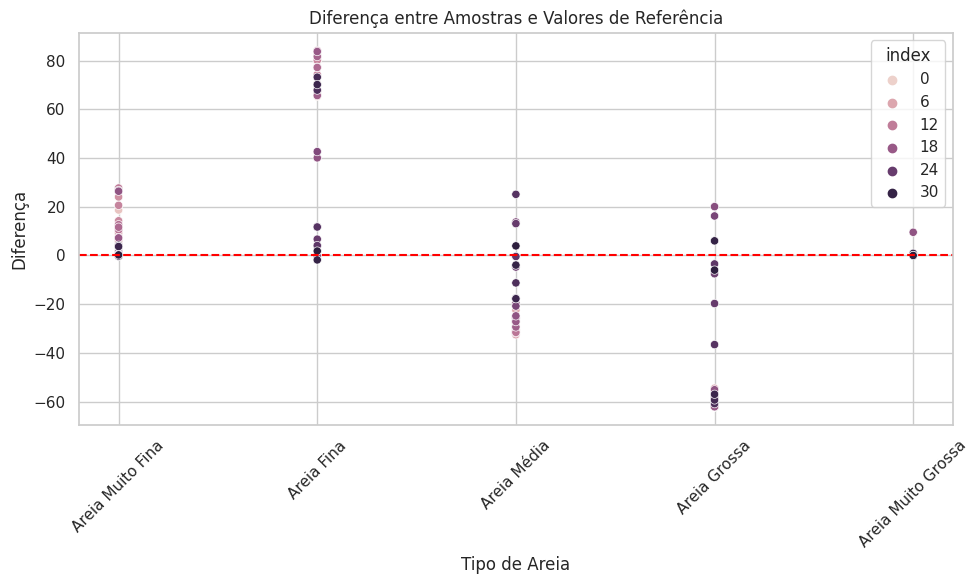

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando ref_df novamente, para referência
data_ref = {
    'Amostras': ['Pt ext 1 praia Resultado', 'Pt ext 2 praia Resultado'],
    'Areia Muito Fina': [00.19, 00.68],
    'Areia Fina': [002.83, 006.46],
    'Areia Média': [028.88, 036.75],
    'Areia Grossa': [068.11, 056.11],
    'Areia Muito Grossa': [000.00, 000.00]
}
ref_df = pd.DataFrame(data_ref)
ref_df.set_index('Amostras', inplace=True)

# Ajustando as colunas
aligned_columns = df.columns.intersection(ref_df.columns)

# Calculando as diferenças apenas para colunas alinhadas
differences = df.loc[:, aligned_columns].subtract(ref_df.mean())

# Mudando o formato do DataFrame para long format para o plot
differences_melted = differences.reset_index().melt(id_vars=df.index.name or 'index', var_name='Tipo de Areia', value_name='Diferença')

# Plotando as diferenças
plt.figure(figsize=(10, 6))
sns.scatterplot(data=differences_melted, x='Tipo de Areia', y='Diferença', hue=df.index.name or 'index')
plt.axhline(0, color='red', linestyle='--')  # Adiciona uma linha horizontal em y=0
plt.title('Diferença entre Amostras e Valores de Referência')
plt.xlabel('Tipo de Areia')
plt.ylabel('Diferença')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


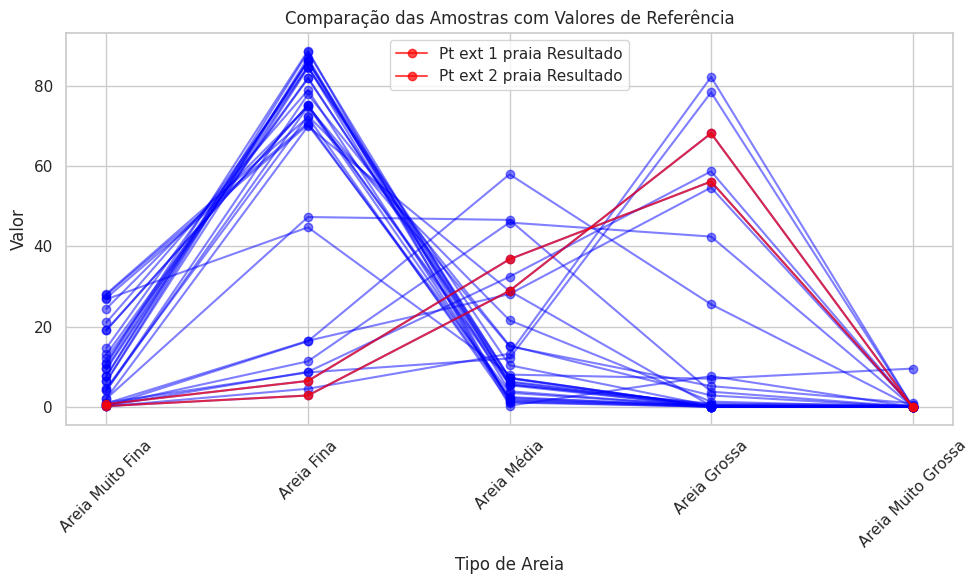

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponho que 'df' seja seu dataframe com as amostras e 'ref_df' com os valores de referência.

plt.figure(figsize=(10,6))



# Plotando as amostras em azul
for index, row in df.iterrows():
    plt.plot(row.index[1:], row.values[1:], color='blue', marker='o', linestyle='-', alpha=0.5)  # Supondo que os valores começam da terceira

# Plotando os valores de referência em vermelho
for index, row in ref_df.iterrows():
    plt.plot(row.index, row.values, color='red', marker='o', linestyle='-', alpha=0.7, label=index)

plt.title('Comparação das Amostras com Valores de Referência')
plt.xlabel('Tipo de Areia')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [256]:
import statsmodels.api as sm

# Supondo que o df já esteja definido e carregado com seus dados.

# Selecione as variáveis independentes (X) e a variável dependente (Y)
X = df[['Areia Muito Fina', 'Areia Média', 'Areia Grossa', 'Areia Muito Grossa']]
Y = df['Areia Fina']

# Adicione uma constante ao modelo (isso adiciona uma intercepto ao modelo)
X = sm.add_constant(X)

# Ajuste o modelo de regressão múltipla
model = sm.OLS(Y, X).fit()

# Mostre um resumo do modelo ajustado
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Areia Fina   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.290e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.89e-52
Time:                        19:55:57   Log-Likelihood:                -11.648
No. Observations:                  32   AIC:                             33.30
Df Residuals:                      27   BIC:                             40.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                101.0644      0

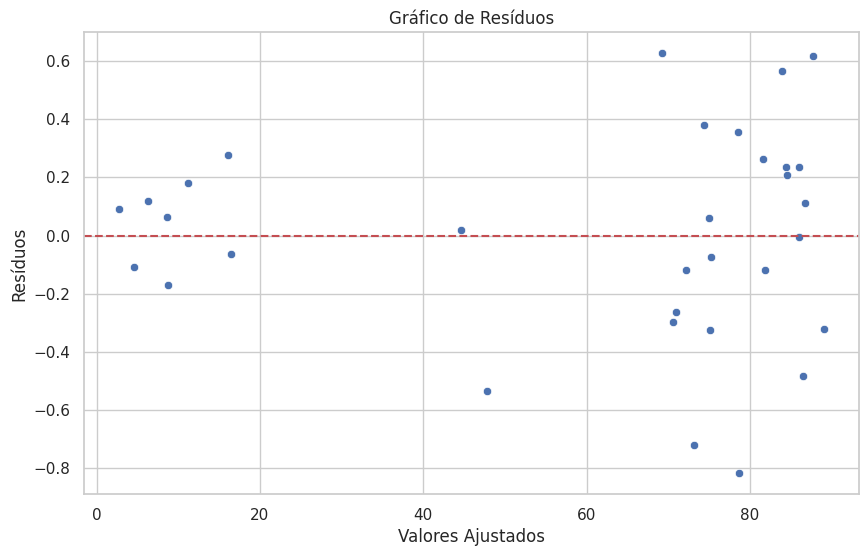

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula os resíduos
residuals = model.resid

# Cria um gráfico de resíduos
plt.figure(figsize=(10,6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()


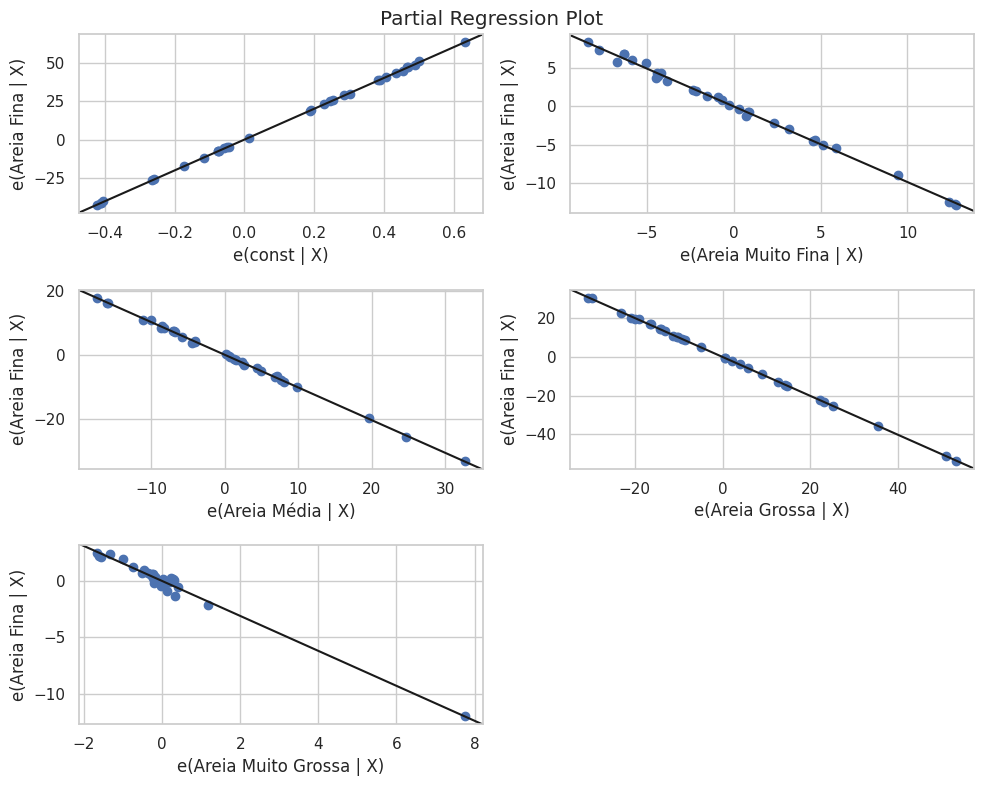

In [258]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)


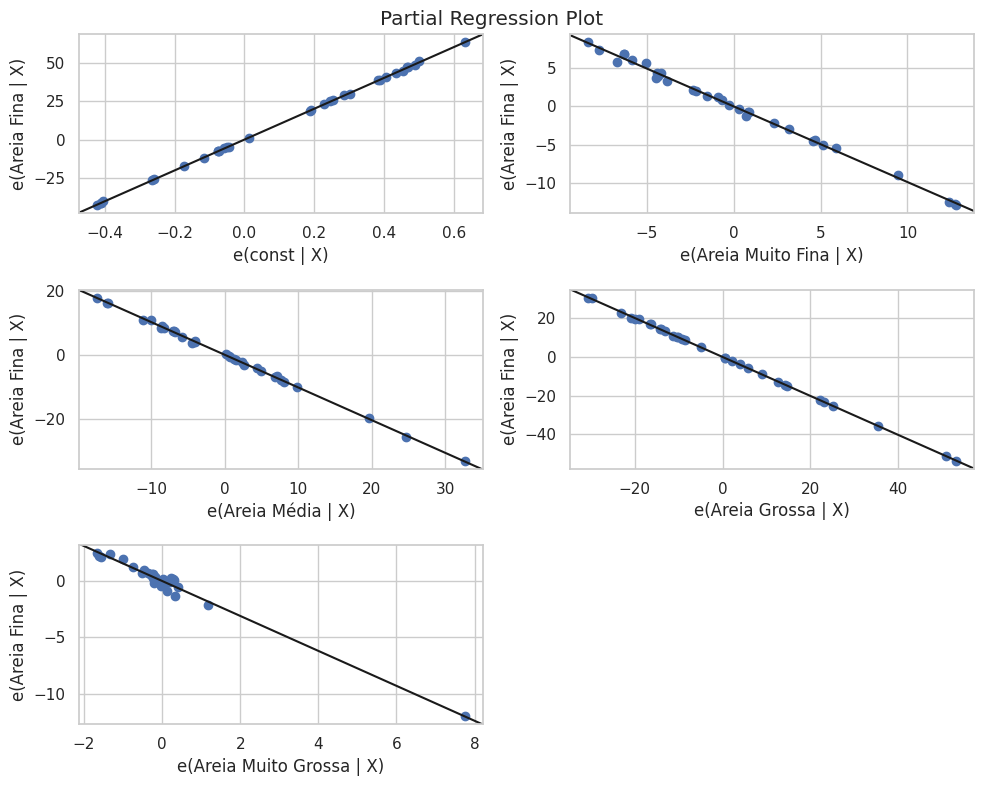

In [259]:
fig

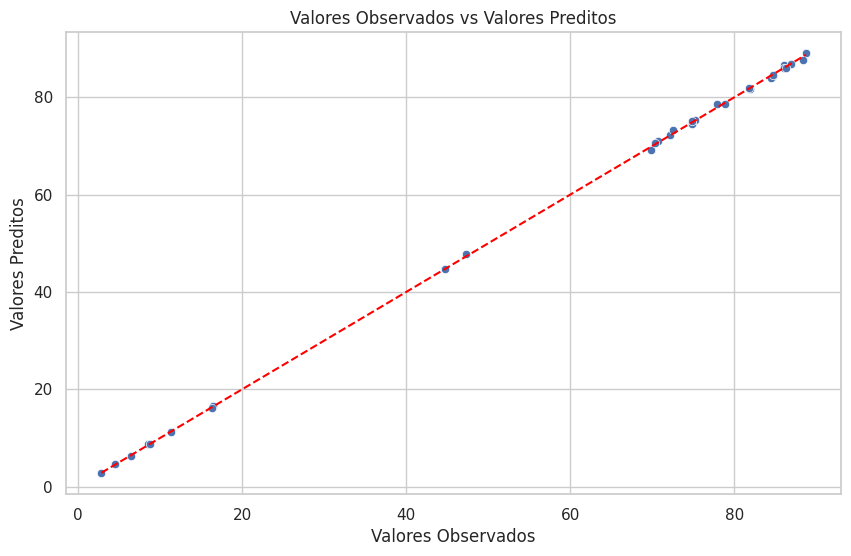

In [260]:
predicted_values = model.predict(X)
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y, y=predicted_values)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--')
plt.title('Valores Observados vs Valores Preditos')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')
plt.show()


In [261]:
import statsmodels.api as sm

X = sm.add_constant(X) # Adicionando uma constante ao modelo
model = sm.OLS(Y, X).fit() # Ajustando o modelo


In [262]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Areia Fina   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.290e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.89e-52
Time:                        19:56:01   Log-Likelihood:                -11.648
No. Observations:                  32   AIC:                             33.30
Df Residuals:                      27   BIC:                             40.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                101.0644      0

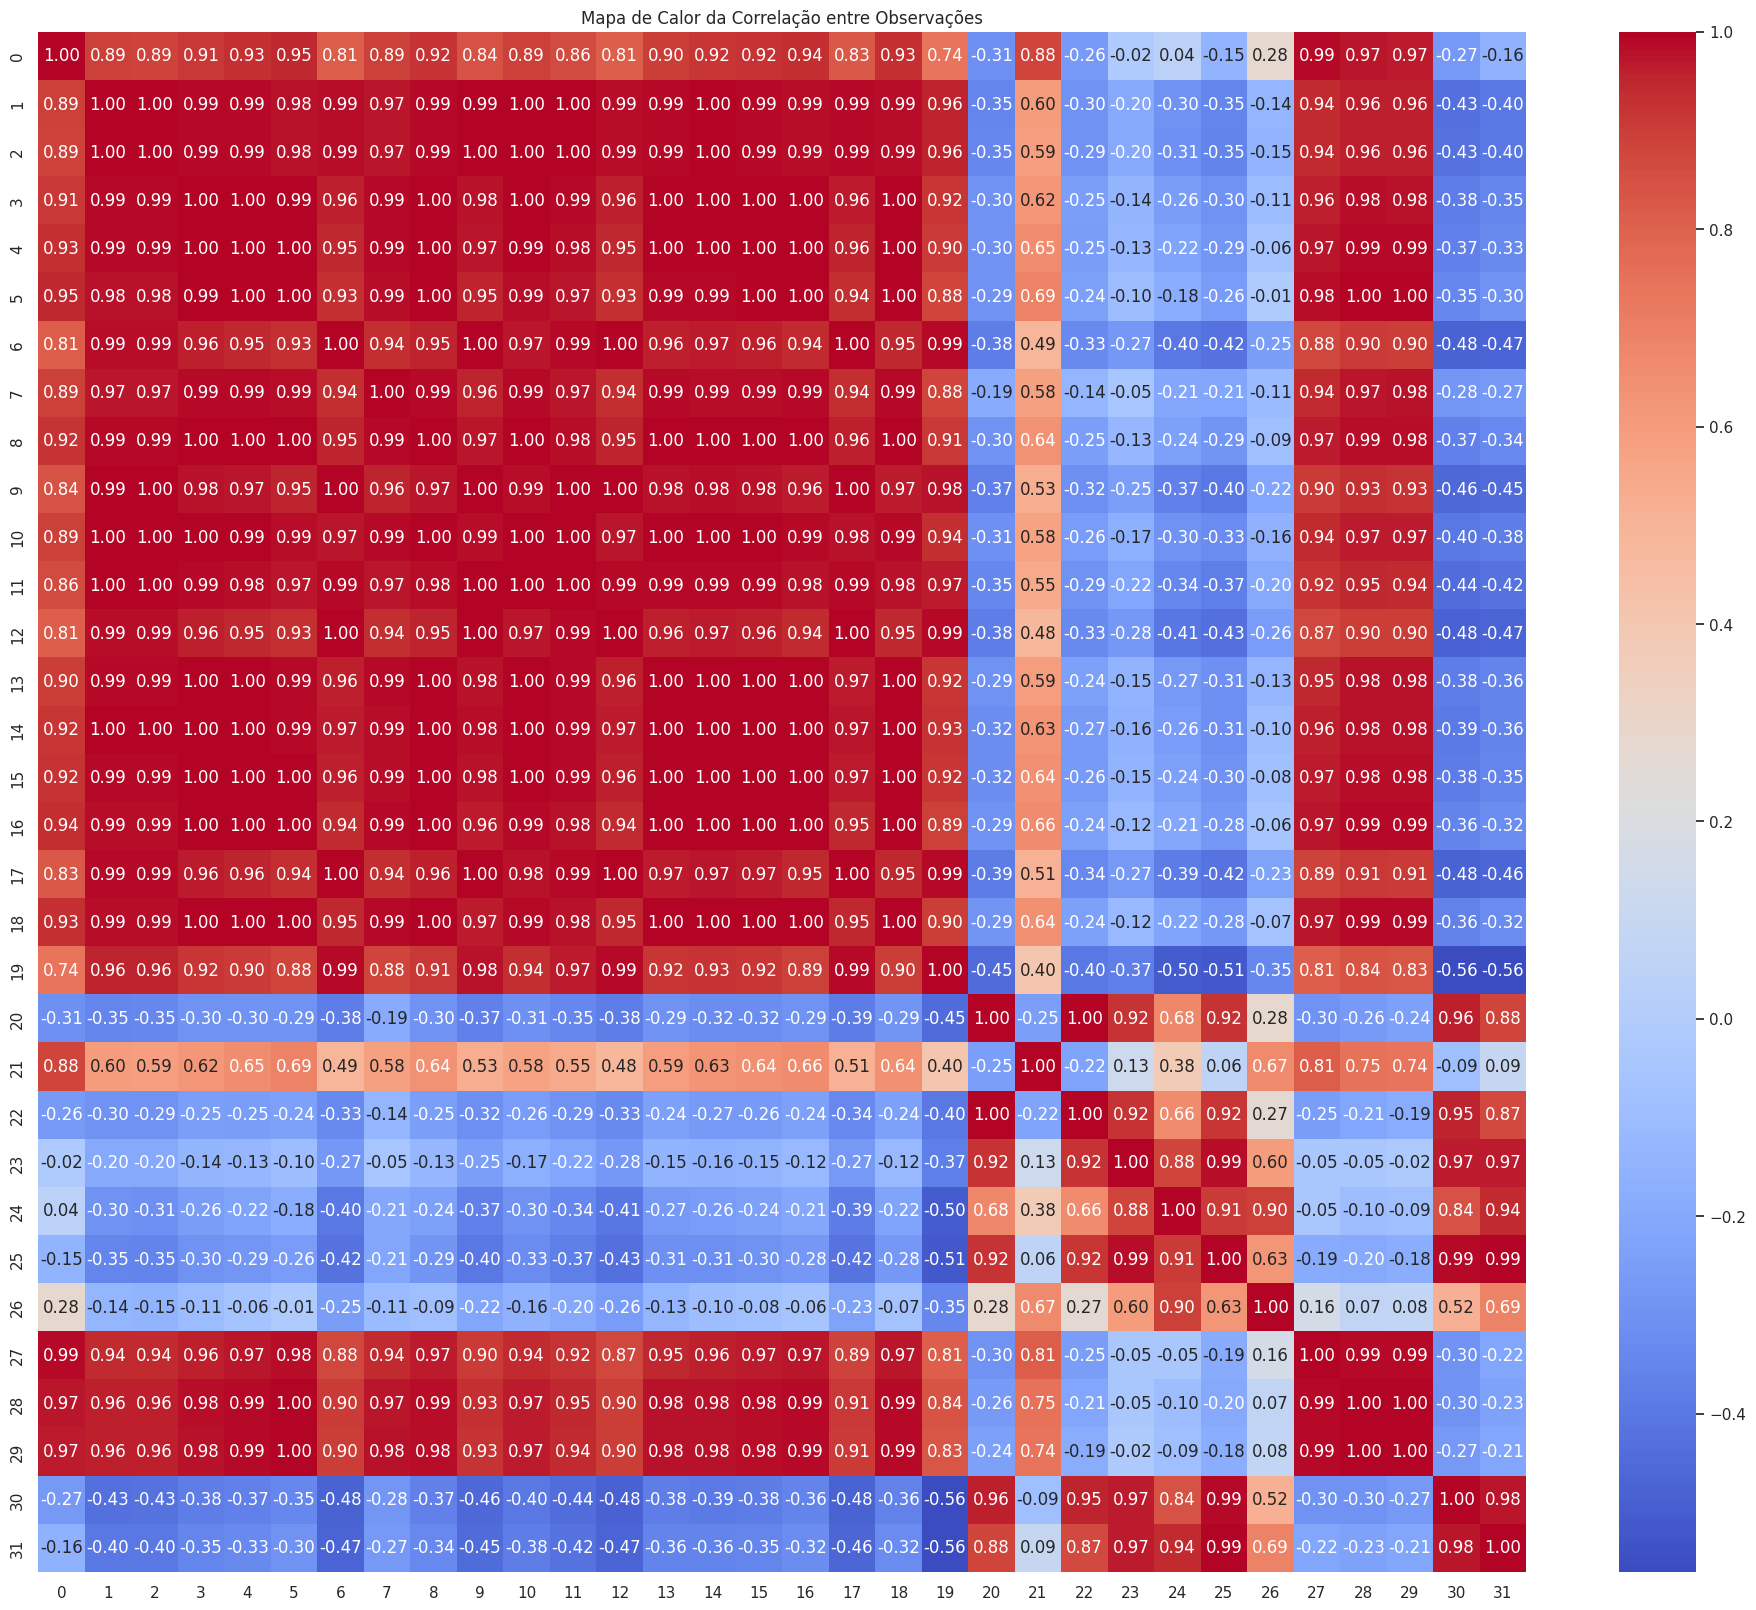

In [263]:
# Transpondo o DataFrame
df_transposed = df_plot.T  # ou df.transpose()

# Calculando a matriz de correlação das observações transpostas
corr_matrix_obs = df_transposed.corr()

# Visualizando a matriz de correlação com um mapa de calor
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix_obs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Observações')
plt.show()